<a href="https://colab.research.google.com/github/kakkarsaab/Car_Prices/blob/master/Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

# **CAR PRICES - EDA REPORT**

A Chinese automobile company **Geely Auto** aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:



**Which variables are significant in predicting the price of a car**

**How well those variables describe the price of a car**


Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

**Let's start importing the common libraries which will be used for the analysis**

## **General Overview Of the Dataset**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

So, there are **205 rows** and **26 columns**

In [2]:
### Reading the file from pandas read_csv method
df = pd.read_csv("CarPrice_Assignment.csv")

### Exploring the first five rows of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## **Summary of the Dataset**

In [3]:
### Dataset summary
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


From the above summary of the dataset we note that the **maximum price** of car is **45400** and **minimum price** is **5118**. We also note that the maximum carlength is 208.10 and carwidth is 141.10. 

We observe that the maximum horsepower of a car is 288 and minimum horsepower is 48. The **Horsepower** tells us that how fast a car ultimately is. 

The mean  mpg of a car on a highway is 30.75 and on city is 25.21.

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
### Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## **DATA PREPARATION**

In [6]:
### Let's check If there are any null values in our dataset or not
df.apply(lambda x: sum(x.isnull())).to_frame()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


There are no null values in our dataset. Let's work ahead now.

## **Deriving New Columns**

There is a variable named **CarName** which is comprised of two parts - the first word is the

name of **'car company'** and the second is the **'car model'**. For example, **chevrolet impala**

has 'chevrolet' as the car company name and 'impala' as the car model name.

Let's derive a new column as **Company_Name** on which we'll be working upon.

In [0]:
### Deriving new column as Company_Name for CarName

CompName = df["CarName"].str.split(" ", n = 1, expand = True) 
df["Company_Name"]= CompName[0]

As we will only consider Company_Name for the model building so we cann drop CarName for

further analysis. We see that car_ID didn't make much impact on our data so we can drop that also. 

In [0]:
### Dropping the columns car_Id and CarName 
df1 = df.drop(['car_ID','CarName'], axis = 1)

In [9]:
### Let's check the head of the dataset now
df1.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


The variables in our dataset are broadly classified into two types:- Categorical & Continuous.

In [0]:
categorical_columns = [x for x in df1.dtypes.index if df1.dtypes[x]=='object']

In [11]:
categorical_columns

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Company_Name']

In [0]:
continuous_columns = [x for x in df1.dtypes.index if df1.dtypes[x]!='object']

In [13]:
continuous_columns

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

## **UNIVARIATE ANALYSIS**

Let us go through each of the independent variable present in the dataset and check which variable
influences the change in price of the car.

## **Symboling**

Symboling corresponds to the degree to which the auto is more risky than its price indicates. 

A value of +3 indicates that the auto is risky, -2 that it is probably pretty safe.

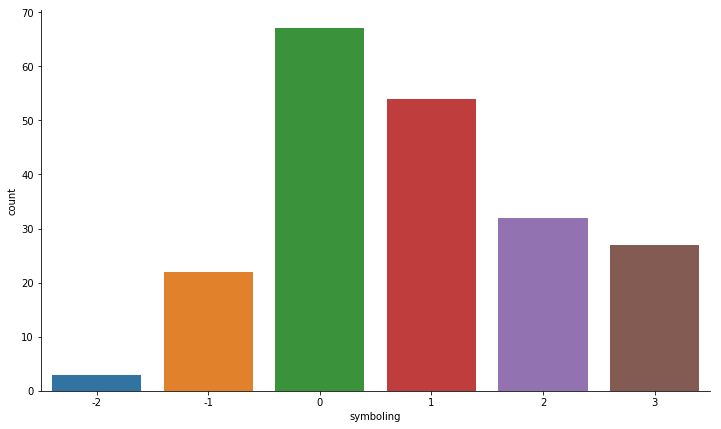

In [14]:
### Distribution of plot for Symboling

plt.figure(figsize = (12,7))
sns.countplot(df['symboling'])
sns.set_style("darkgrid", {'axes.grid' : True})
sns.despine()

In [15]:
### Stats for Symboling
df['symboling'].describe().to_frame()

,symboling
count,205.000000
mean,0.834146
std,1.245307
min,-2.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [16]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

From the above graph we observe that:-

1. There are about 67 cars with symboling 0. which means that the auto is not much safe nor pretty risky.

2. There are more cars with symboling 0 ,1 & 2 which indicates that the auto is more risky.

## **Fuel Type**

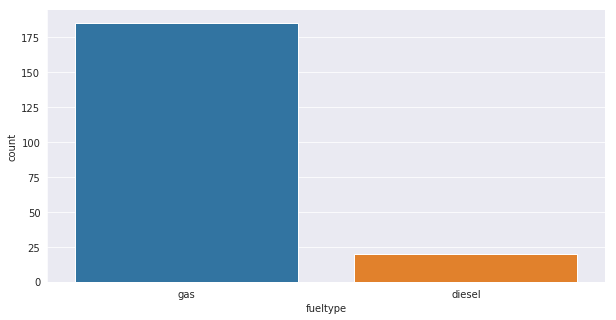

In [17]:
### Plot distribution to show the type of fuel on which car runs
plt.figure(figsize= (10,5))
sns.countplot(df['fueltype'])
sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine()


In [18]:
df['fueltype'].value_counts().to_frame()

,fueltype
gas,185
diesel,20


So we observe that out of 205 cars , there are 185  cars which runs on Gas and 20 cars which runs on
diesel.

## **Aspiration**

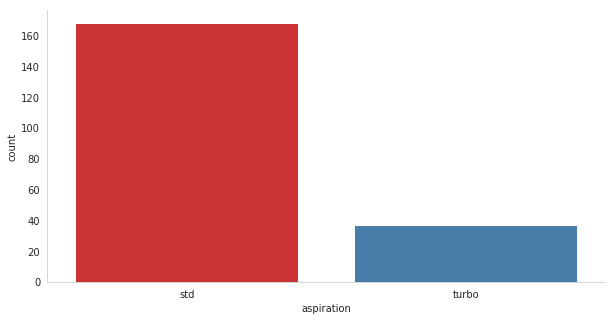

In [19]:
### Aspiration
plt.figure(figsize = (10,5))
sns.countplot(x='aspiration', palette = 'Set1', data=df)
sns.despine()

In [20]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

There are 168 cars which uses std as aspiration and only 37 cars using turbo as aspiration.

## **Door Number**

In [21]:
df['doornumber'].describe().to_frame()

,doornumber
count,205
unique,2
top,four
freq,115


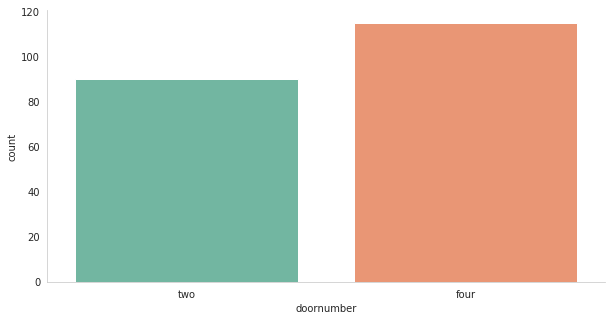

In [22]:
### Plot to determine the number of doors in cars
plt.figure(figsize = (10,5))
sns.countplot(x='doornumber', palette = 'Set2', data=df)
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()

The above plot tells us about the number of doors in cars. We see that there are more cars with 

four doors than two doors. 

In [23]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

There are 115 cars with four doors and 90 cars with two doors.

## **Car Body**

In [24]:
df['carbody'].describe().to_frame()

,carbody
count,205
unique,5
top,sedan
freq,96


In [25]:
df['carbody'].value_counts().to_frame()

,carbody
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


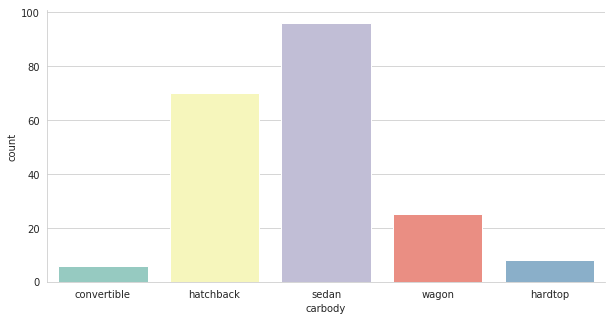

In [26]:
### plot to determine the type of car body

plt.figure(figsize = (10,5))
sns.countplot(x='carbody', palette = 'Set3', data=df)
sns.set_style("darkgrid", {'axes.grid' : True})
sns.despine()

We observe that sedan carbody has the highest frequency and there are very less number of cars
with convertible carbody.

## **Drive Wheel**

A drive wheel is a wheel of a motor vehicle that transmits force, transforming torque into tractive 
force from the tires to the road, causing the vehicle to move. 

In [27]:
df['drivewheel'].describe().to_frame()

,drivewheel
count,205
unique,3
top,fwd
freq,120


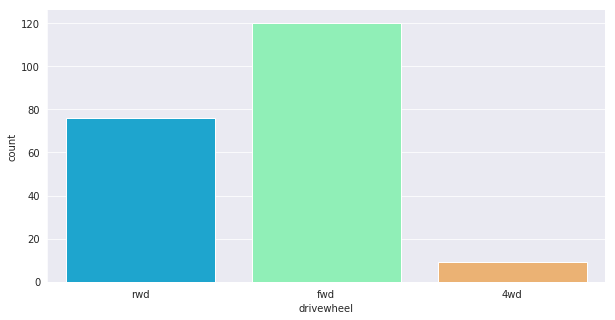

In [28]:
### plot to determine the drive wheel

plt.figure(figsize = (10,5))
sns.countplot(x='drivewheel', palette = 'rainbow', data=df)
sns.set_style("darkgrid", {'axes.grid' : False})
sns.despine()

We note that the there are maximum number of cars with fwd drive wheel

and very  few cars with  4wd driveweheel.

## **Engine Location**

In [29]:
### Stats for Engine Location
df['enginelocation'].describe().to_frame()

,enginelocation
count,205
unique,2
top,front
freq,202


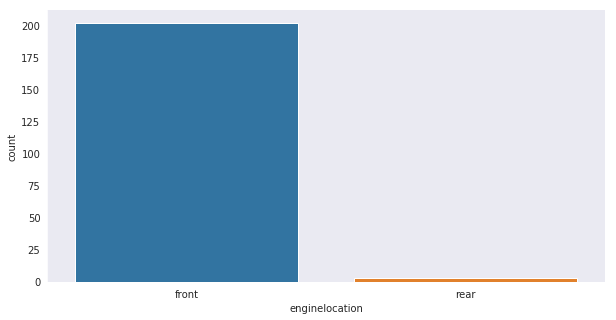

In [30]:
### Plot distribution to tell the place of car engine

plt.figure(figsize= (10,5))
sns.countplot(df['enginelocation'])
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()

In [31]:
df['enginelocation'].value_counts().to_frame()

,enginelocation
front,202
rear,3


1. Only 3 instances of rear engine cars are found.

2. The data is skewed with front engine having very high frequency.

## **Wheelbase**

The wheelbase is the distance between the centers of the front and rear wheels. 

In [32]:
### Stats for wheelbase
df['wheelbase'].describe().to_frame()

,wheelbase
count,205.000000
mean,98.756585
std,6.021776
min,86.600000
25%,94.500000
50%,97.000000
75%,102.400000
max,120.900000


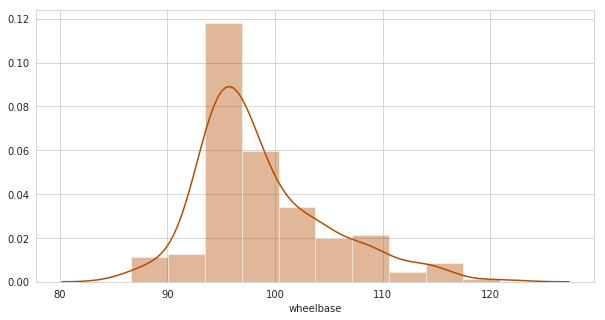

In [33]:
### PLot distribution for wheelbase
plt.figure(figsize=(10,5))
sns.distplot(df["wheelbase"], bins=10 ,kde=True,color=(0.7, 0.3, 0))
plt.xlabel("wheelbase")
plt.show()

We observe that maximum number of wheelbase are from 94 to 98

## **Car Length**

In [34]:
df['carlength'].describe().to_frame()

,carlength
count,205.000000
mean,174.049268
std,12.337289
min,141.100000
25%,166.300000
50%,173.200000
75%,183.100000
max,208.100000


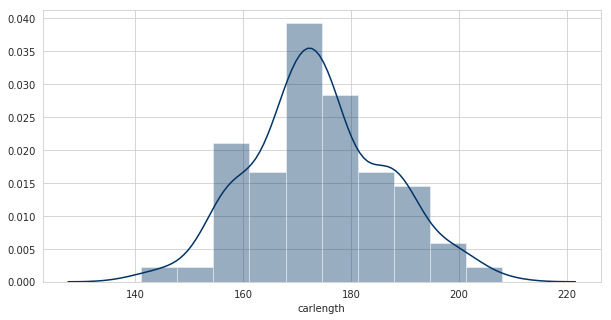

In [35]:
### PLot distribution for carlength
plt.figure(figsize=(10,5))
sns.distplot(df["carlength"], bins=10 ,kde=True,color=(0, 0.2, 0.4))
plt.xlabel("carlength")
plt.show()

1. Most of the cars have length between 170 to 180 units.

2. The curve appears like a uniform distribution curve symettric around 170.

## **Carwidth**

In [36]:
df['carwidth'].describe().to_frame()

,carwidth
count,205.000000
mean,65.907805
std,2.145204
min,60.300000
25%,64.100000
50%,65.500000
75%,66.900000
max,72.300000


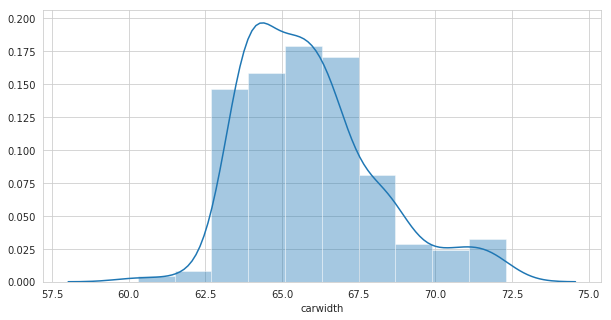

In [37]:
### PLot distribution for carwidth
plt.figure(figsize=(10,5))
sns.distplot(df["carwidth"], bins=10 ,kde=True)
plt.xlabel("carwidth")
plt.show()

The maximum carwidth is 72 and minimum carwidth is 60.

## **Engine type**

In [38]:
### Stats for enginetype
df['enginetype'].describe().to_frame()

,enginetype
count,205
unique,7
top,ohc
freq,148


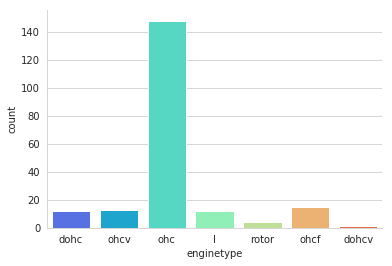

In [39]:
sns.countplot(df['enginetype'], palette = 'rainbow')
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()

We observe that:-

1. Most of the cars have ohc engine type.

2. The next popular engine in cars are dohc, ohcv, I and ohcf which have the same frequency .

3. Rotor and dohcv engines are negligible in the given data.

## **Cylinder Number**

In [40]:
df['cylindernumber'].describe().to_frame()

,cylindernumber
count,205
unique,7
top,four
freq,159


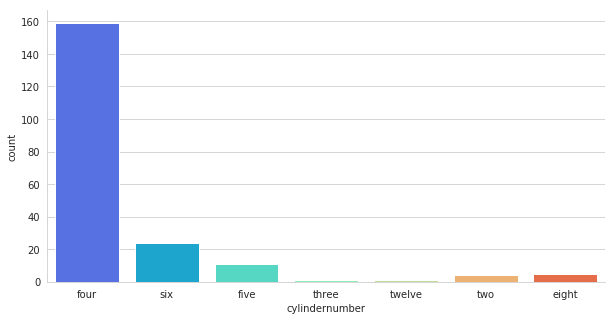

In [41]:
### PLot distribution to show cylindernumber

plt.figure(figsize=(10,5))
sns.countplot(df['cylindernumber'], palette = 'rainbow')
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()

1. Most of the cars have four cylinders.

2. There are very few or negligibe cars with three or twelve cylindernumber

## **Engine Size**

In [42]:
### Stats for enginesize
df['enginesize'].describe().to_frame()

,enginesize
count,205.000000
mean,126.907317
std,41.642693
min,61.000000
25%,97.000000
50%,120.000000
75%,141.000000
max,326.000000


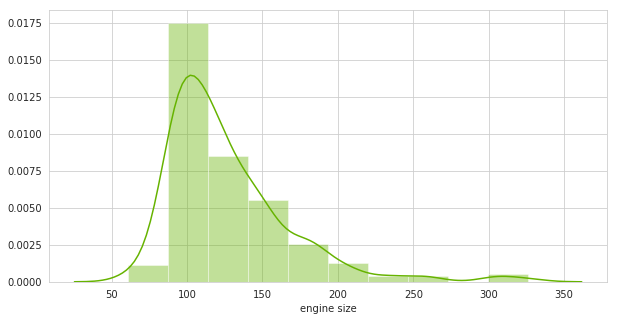

In [43]:
### PLot distribution for enginesize
plt.figure(figsize=(10,5))
sns.distplot(df["enginesize"], bins=10,color=(0.4, 0.7, 0))
plt.xlabel("engine size")
plt.show()

1. There are most of the cars with enginesize as 100.

2. The maximum enginesize is 326.

## **Fuel System**

In [44]:
### Stats for fuelsystem
df['fuelsystem'].describe().to_frame()

,fuelsystem
count,205
unique,8
top,mpfi
freq,94


In [45]:
df['fuelsystem'].value_counts().to_frame()

,fuelsystem
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
spfi,1
mfi,1


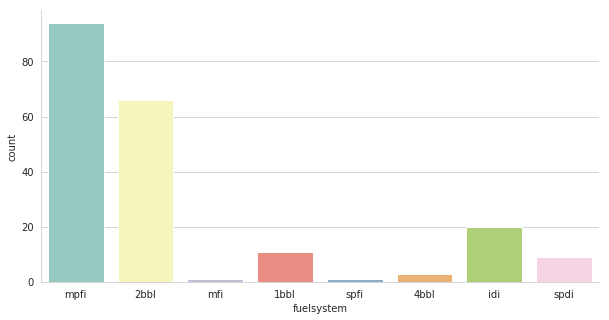

In [46]:
### Plot distribution to show the type of fuelsystem
plt.figure(figsize=(10,5))
sns.countplot(df['fuelsystem'], palette ='Set3')
sns.set_style("darkgrid", {'axes.grid' : True})
sns.despine()

There are 94 about cars which mpfi fuelsystem .

There is only 1 car with mfi and spfi fuel system which means that people dosn't like to buy cars with these type of fuelsystem.

## **Bore Ratio**

In [47]:
### Stats for boreratio
df['boreratio'].describe().to_frame()

,boreratio
count,205.000000
mean,3.329756
std,0.270844
min,2.540000
25%,3.150000
50%,3.310000
75%,3.580000
max,3.940000


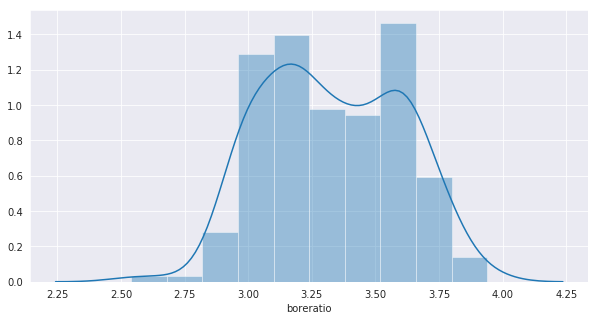

In [48]:
### Plot distribution for Boreratio
plt.figure(figsize=(10,5))
sns.distplot(df["boreratio"], bins=10 ,kde=True)
plt.xlabel("boreratio")
plt.show()

We can see that most of the cars have bore ratio in the range of 3.2 to 3.6.

## **Stroke**

In [49]:
### Stats for Stroke
df['stroke'].describe().to_frame()

,stroke
count,205.000000
mean,3.255415
std,0.313597
min,2.070000
25%,3.110000
50%,3.290000
75%,3.410000
max,4.170000


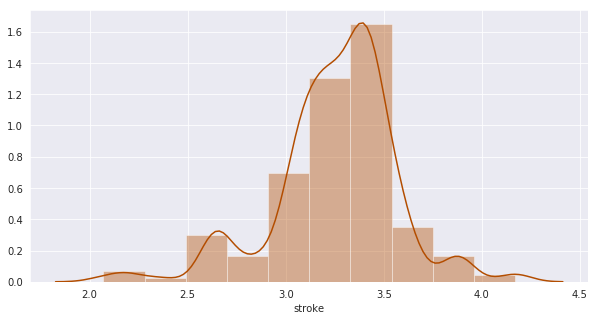

In [50]:
### Plot distribution for Stroke
plt.figure(figsize=(10,5))
sns.distplot(df["stroke"], bins=10 ,kde=True, color= (0.7, 0.3, 0))
plt.xlabel("stroke")
plt.show()

Most of the cars have stroke from 3.0 - 3.5

## Compression Ratio

The compression ratio is the ratio of the volume of the cylinder and the combustion chamber 

when the piston is at the bottom, and the volume of the combustion chamber when the piston 

is at the top. 

In [51]:
df['compressionratio'].describe().to_frame()

,compressionratio
count,205.000000
mean,10.142537
std,3.972040
min,7.000000
25%,8.600000
50%,9.000000
75%,9.400000
max,23.000000


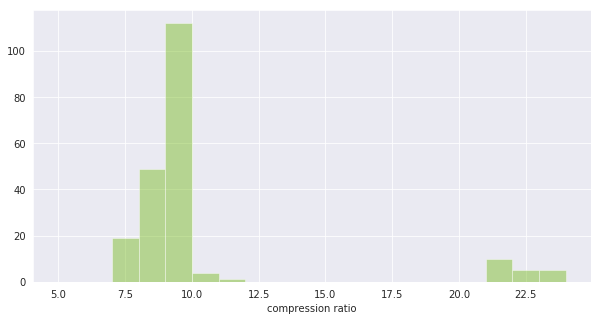

In [52]:
### Distribution of plot for compressionratio

plt.figure(figsize=(10,5))
sns.distplot(df["compressionratio"], bins=range(5,25, 1),color=(0.4, 0.7, 0),kde=False)
plt.xlabel("compression ratio")
plt.show()

There are most of the cars with compression ratio 10

Very few cars have a compressionratio from 21-23

## **HorsePower**

In [53]:
### Stats for horsepower
df['horsepower'].describe().to_frame()

,horsepower
count,205.000000
mean,104.117073
std,39.544167
min,48.000000
25%,70.000000
50%,95.000000
75%,116.000000
max,288.000000


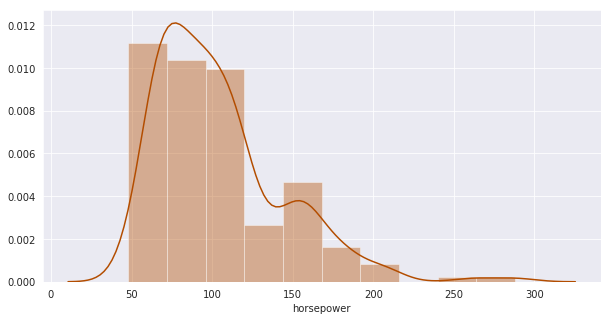

In [54]:
### Plot distribution for horsepower
plt.figure(figsize=(10,5))
sns.distplot(df["horsepower"], bins=10 ,kde=True, color= (0.7, 0.3, 0))
plt.xlabel("horsepower")
plt.show()

Most cars have horse power of 60 to 100.

Very few cars have horse power more than 150.

## **City Mileage**

In [55]:
### Stats for citympg
df['citympg'].describe().to_frame()

,citympg
count,205.000000
mean,25.219512
std,6.542142
min,13.000000
25%,19.000000
50%,24.000000
75%,30.000000
max,49.000000


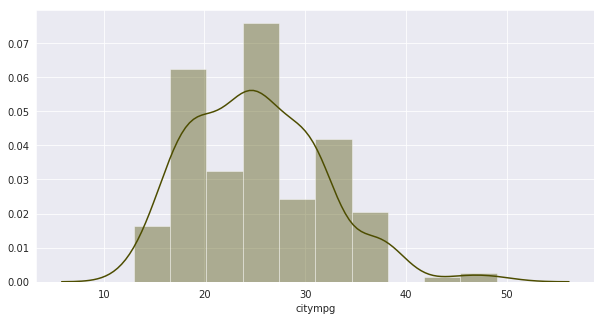

In [56]:
### Plot distribution for citympg
plt.figure(figsize=(10,5))
sns.distplot(df["citympg"], bins=10 ,kde=True, color= (0.3, 0.3, 0))
plt.xlabel("citympg")
plt.show()

Maximum cars have a city mileage of 25.

The minimum mileage of a car while running in a city is 13, which is too less. 

## **Highway Mileage**

In [57]:
### Stats for highwaympg
df['highwaympg'].describe().to_frame()

,highwaympg
count,205.000000
mean,30.751220
std,6.886443
min,16.000000
25%,25.000000
50%,30.000000
75%,34.000000
max,54.000000


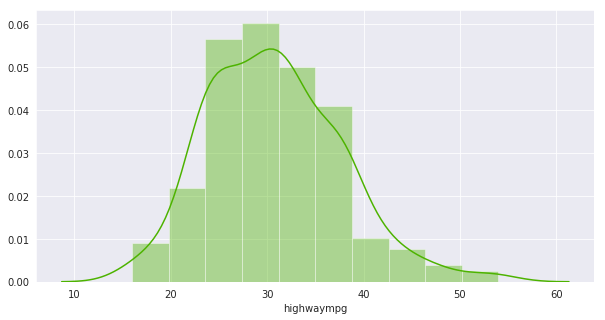

In [58]:
### Plot distribution for highwaympg
plt.figure(figsize=(10,5))
sns.distplot(df["highwaympg"], bins=10 ,kde=True, color= (0.3, 0.7, 0))
plt.xlabel("highwaympg")
plt.show()

From the above plot we observe that on highway mileage of most of the cars is 30 and

the maximum highwaympg is 54.

## **Price**

In [59]:
df['price'].describe().to_frame()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


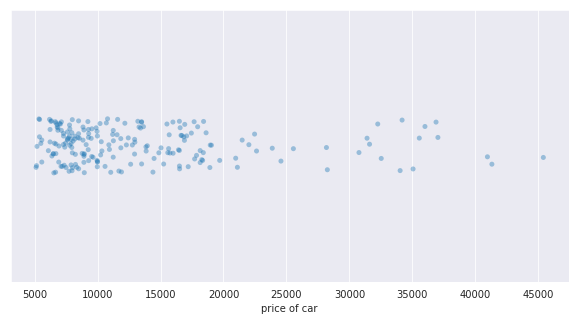

In [60]:
### Plot distribution for Price of car
plt.figure(figsize=(10,5))
sns.stripplot(df["price"],jitter=True,alpha=0.4)
plt.xlabel("price of car")
plt.show()

Most of the cars have prices from 5000-1000. We can state that prices of cars between 5000 to 10000 are bought by customers more as it is in their budget.

Very few cars have price from 25000 - 50000 as their demand is less in the US market.


## **Company Name**

In [61]:
### Stats for company name
df['Company_Name'].describe().to_frame()

,Company_Name
count,205
unique,28
top,toyota
freq,31


In [62]:
df['Company_Name'].value_counts().to_frame()

,Company_Name
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
volvo,11
peugeot,11
dodge,9
volkswagen,9


We note that some of the company names are repeated or they have a spelling mistake. So let 

us first replace those worng names with the correct one's. 



In [0]:
### Code to replace the anamolies present In the data

df['Company_Name'] = df['Company_Name'].replace(['maxda'], 'mazda')
df['Company_Name'] = df['Company_Name'].replace(['porcshce'],'porsche')
df['Company_Name'] = df['Company_Name'].replace(['vw'], 'volkswagen')
df['Company_Name'] = df['Company_Name'].replace(['vokswagen'], 'volkswagen')
df['Company_Name'] = df['Company_Name'].replace(['volksvagen'], 'volkswagen')
df['Company_Name'] = df['Company_Name'].replace(['toyouta'], 'toyota')
df['Company_Name'] = df['Company_Name'].replace(['Nissan'], 'nissan')



In [64]:
df['Company_Name'].describe()

count        205
unique        22
top       toyota
freq          32
Name: Company_Name, dtype: object

Now see that only 22 unique values are left instead of 28.

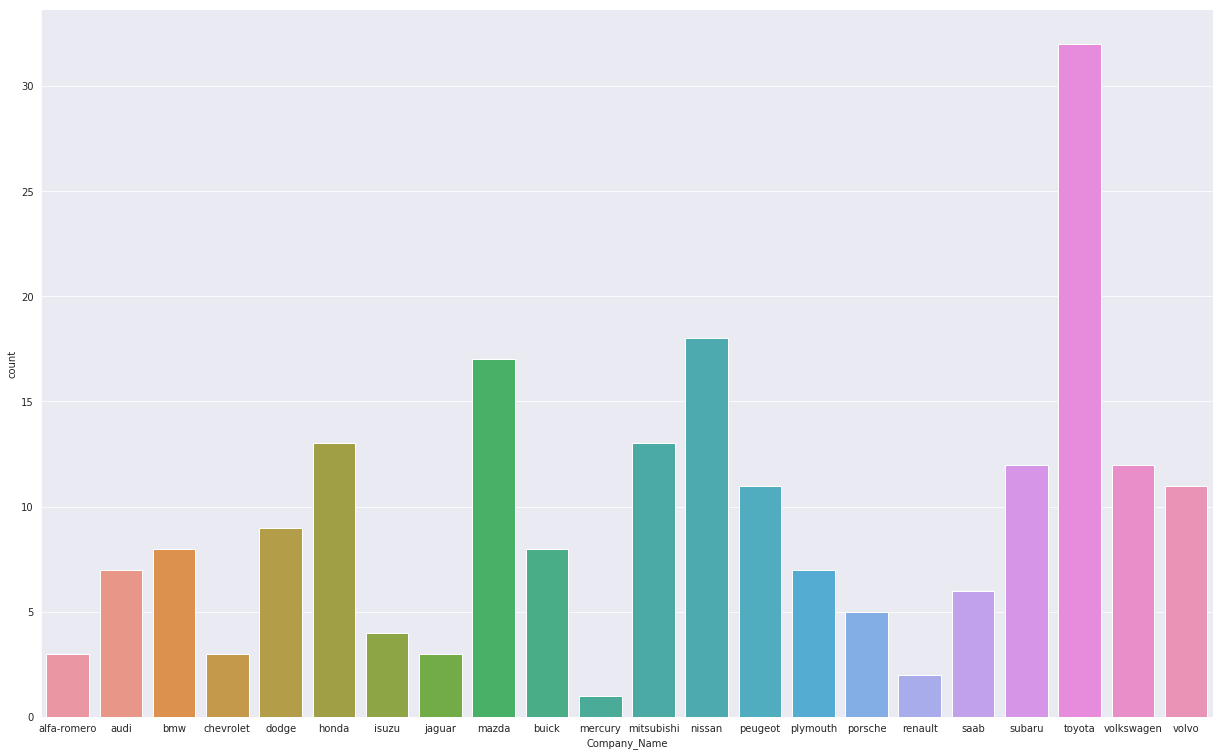

In [65]:
### Plot distribution to show company  name

plt.figure(figsize=(21,13))
sns.countplot(df['Company_Name'])
sns.set_style("darkgrid", {'axes.grid' : True})
sns.despine()

We see that highest number of cars are Toyota. 

# **Bivariate Analysis**

Let us do the Bivariate analysis to know more about the features which affects the Prices of a

car in US market.



## **Symboling vs Price**

In [66]:
### Stats for plot between Symboling & Price

df[['symboling','price']].describe()

,symboling,price
count,205.000000,205.000000
mean,0.834146,13276.710571
std,1.245307,7988.852332
min,-2.000000,5118.000000
25%,0.000000,7788.000000
50%,1.000000,10295.000000
75%,2.000000,16503.000000
max,3.000000,45400.000000


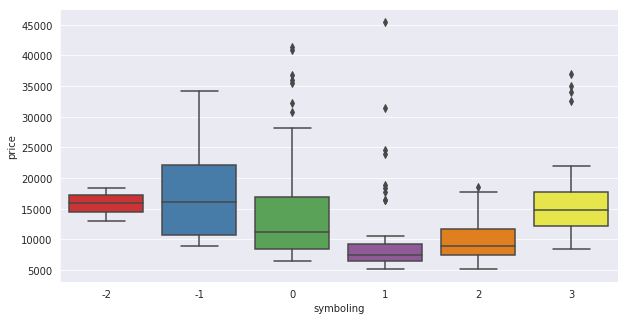

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(x="symboling", y="price", data=df, palette='Set1')
sns.despine()

1. Cars with Symboling 1 has the highest car price.

2. 1 & 2 symboling cars have the lowest car price but we can see some of 

of the outliers present in symboling 1 cars.

## **Fuel Type VS Price**

In [68]:
### Stats for plot between Symboling & Price
df[['fueltype','price']].describe()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


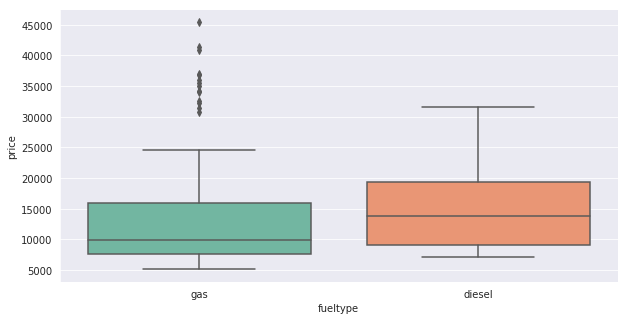

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(x="fueltype", y= "price", data=df, palette="Set2")
sns.despine()



*   Cars with Diesel have high price compared to cars with gas.

*  Cars with gas are more with the lesser price.



## **Aspiration vs Price**

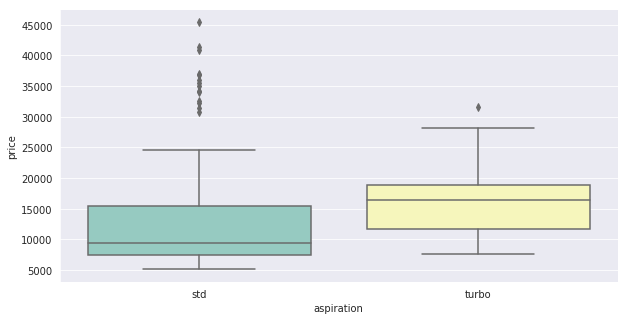

In [70]:
### Plot distribution for Aspiration vs Price
plt.figure(figsize=(10,5))
sns.boxplot(x="aspiration", y= "price", data=df, palette="Set3")
sns.despine()



*   Turbo aspiration has more price than std aspiration which can 

     be clearly observed by looking at the mean price and whiskers 
     
     of the  barplot.


*   Std aspiration consists of many outliers.



## **Door Number vs Price**

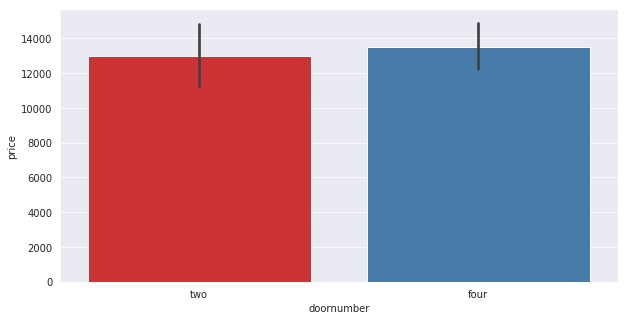

In [71]:
### PLot distribution for Door Number vs Price
plt.figure(figsize=(10,5))
sns.barplot(x="doornumber", y= "price", data=df, palette="Set1")
sns.despine()

There is not  much difference in the prices of the car with respect to

door number.

## **Car Body vs Price** 

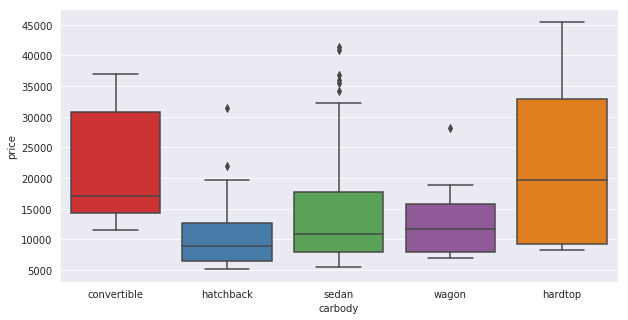

In [72]:
### PLot distribution for Carbody vs Price
plt.figure(figsize=(10,5))
sns.boxplot(x="carbody", y= "price", data=df, palette="Set1")
sns.despine()

1. Cars with hardtop & convertible carbody has very high price.

2. Cars with wagon carbody has the lowest car price. 

## **Drivewheel vs Price**

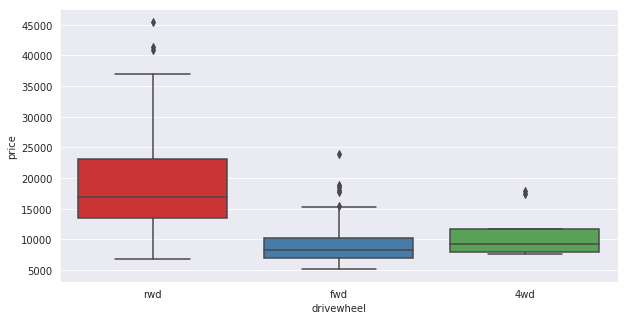

In [73]:
### PLot distribution for Drivewheel vs Price

plt.figure(figsize=(10,5))
sns.boxplot(x="drivewheel", y= "price",data=df, palette="Set1")
sns.despine()

Rwd drive wheel has more price when compared to the other 2 drive wheel types.

## **Enginelocation vs Price**

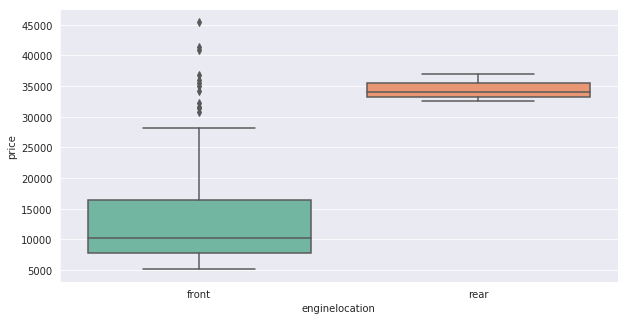

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x="enginelocation", y= "price",data=df, palette="Set2")
sns.despine()

Cars with rear enginelocation have higher price than front enginelocation.


## **Wheelbase vs Price**

In [75]:
### Stats for wheelbase vs Price
df[['wheelbase','price']].describe()

,wheelbase,price
count,205.000000,205.000000
mean,98.756585,13276.710571
std,6.021776,7988.852332
min,86.600000,5118.000000
25%,94.500000,7788.000000
50%,97.000000,10295.000000
75%,102.400000,16503.000000
max,120.900000,45400.000000


<Figure size 1080x576 with 0 Axes>

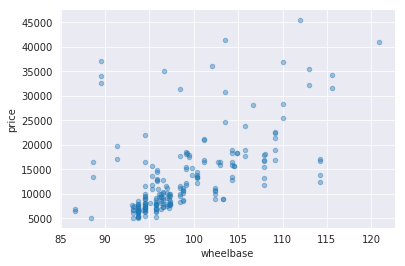

In [76]:
plt.figure(figsize=(15,8))
df.plot.scatter(x="wheelbase", y= "price", alpha=0.4)
sns.despine()

Prices of the car increases with the increase in the wheelbase

## **Car length vs Price**

In [77]:
### Stats for carlength vs price
df[['carlength','price']].describe()

,carlength,price
count,205.000000,205.000000
mean,174.049268,13276.710571
std,12.337289,7988.852332
min,141.100000,5118.000000
25%,166.300000,7788.000000
50%,173.200000,10295.000000
75%,183.100000,16503.000000
max,208.100000,45400.000000


<Figure size 1080x576 with 0 Axes>

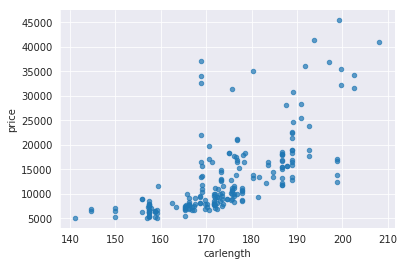

In [78]:
plt.figure(figsize=(15,8))
df.plot.scatter(x="carlength", y= "price", alpha=0.7)
sns.despine()

Cars with carlength 165-180 units have prices mostly from 5000-12000.

## **Car width vs Price**

In [79]:
### Summary for carwidth vs price
df[['carwidth','price']].describe()

,carwidth,price
count,205.000000,205.000000
mean,65.907805,13276.710571
std,2.145204,7988.852332
min,60.300000,5118.000000
25%,64.100000,7788.000000
50%,65.500000,10295.000000
75%,66.900000,16503.000000
max,72.300000,45400.000000


<Figure size 1008x504 with 0 Axes>

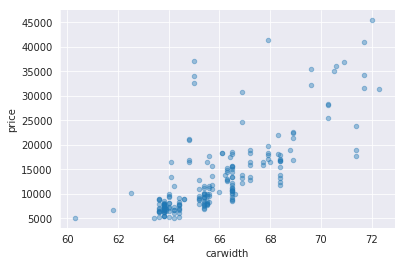

In [80]:
plt.figure(figsize=(14,7))
df.plot.scatter(x="carwidth", y= "price", alpha=0.4)
sns.despine()

Carwidth has a linear realtionship with price.

## **Car height vs Price**

<Figure size 1080x576 with 0 Axes>

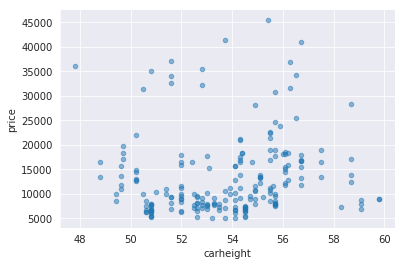

In [81]:
### Plot distribution for carheight vs price
plt.figure(figsize=(15,8))
df.plot.scatter(x="carheight", y= "price", alpha=0.5)
sns.despine()



*   No relation between car height and price



## **Engine Type vs Price**

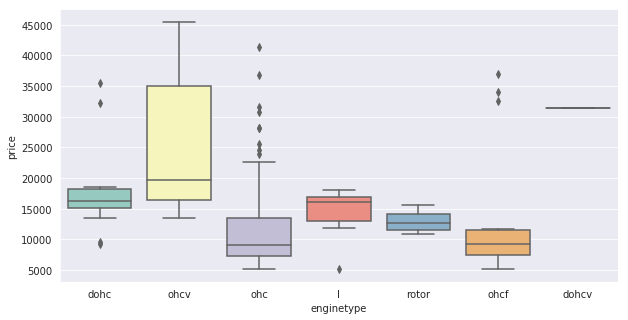

In [82]:
### Plot distribution for enginetype vs Price
plt.figure(figsize=(10,5))
sns.boxplot(x="enginetype", y= "price", data=df, palette="Set3")
sns.despine()



*  Ohcv engine has the highest price and highest range.

*   Ohcv engine has the highest price and highest range.

## **Cylinder Number vs Price**

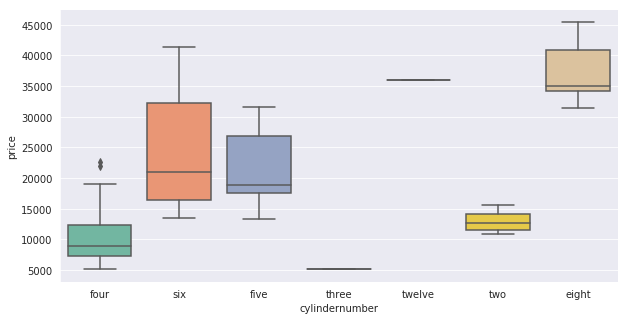

In [83]:
### Plot distribution for cylindernumber vs Price
plt.figure(figsize=(10,5))
sns.boxplot(x="cylindernumber", y= "price", data=df, palette="Set2")
sns.despine()

Cars with eight cylinders has the highest price followed by six cylinders.

Cars with twelve cylinder occur only once in the dataset but the price is quite high.

## **Engine size vs Price**

In [84]:
df[['enginesize','price']].describe()

,enginesize,price
count,205.000000,205.000000
mean,126.907317,13276.710571
std,41.642693,7988.852332
min,61.000000,5118.000000
25%,97.000000,7788.000000
50%,120.000000,10295.000000
75%,141.000000,16503.000000
max,326.000000,45400.000000


<Figure size 1080x576 with 0 Axes>

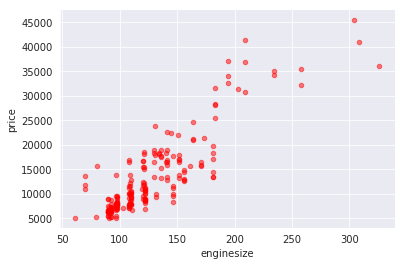

In [85]:
### Plot distribution for enginesize vs price
plt.figure(figsize=(15,8))
df.plot.scatter(x="enginesize", y= "price", alpha=0.5, color='red')
sns.despine()

Bigger the engine size, more is the price of car.

## **Fuel System vs Price**

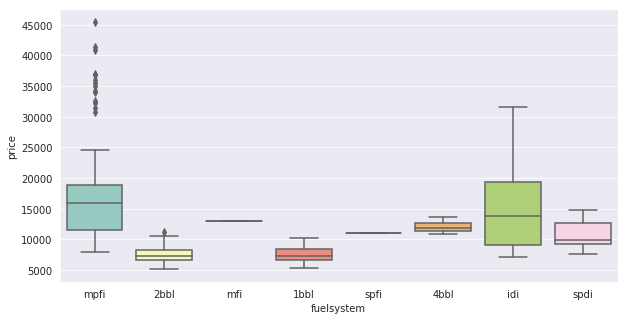

In [86]:
### Plot distribution for fuelsystm vs price
plt.figure(figsize=(10,5))
sns.boxplot(x="fuelsystem", y= "price", data=df, palette= "Set3")
sns.despine()

Mpfi and idi have the highest prices.

There are many outliers in mpfi.

## **Bore Ratio**

In [87]:
df[['boreratio','price']].describe()

,boreratio,price
count,205.000000,205.000000
mean,3.329756,13276.710571
std,0.270844,7988.852332
min,2.540000,5118.000000
25%,3.150000,7788.000000
50%,3.310000,10295.000000
75%,3.580000,16503.000000
max,3.940000,45400.000000


<Figure size 1080x576 with 0 Axes>

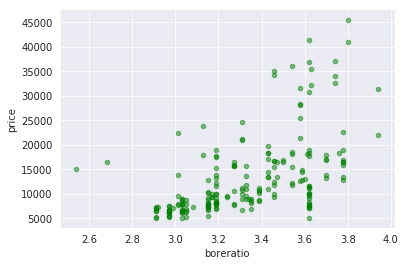

In [88]:
### PLot distribution for boreratio vs price
plt.figure(figsize=(15,8))
df.plot.scatter(x="boreratio", y= "price", alpha=0.5, color='green')
sns.despine()

Most of the cars have price ranging from 5000-10000 for bore ratio between 3.0-3.6.

## **Stroke vs Price**

In [89]:
df[['stroke','price']].describe()

,stroke,price
count,205.000000,205.000000
mean,3.255415,13276.710571
std,0.313597,7988.852332
min,2.070000,5118.000000
25%,3.110000,7788.000000
50%,3.290000,10295.000000
75%,3.410000,16503.000000
max,4.170000,45400.000000


<Figure size 1080x576 with 0 Axes>

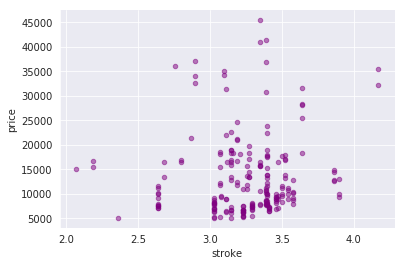

In [90]:
### Plot distribution for stroke vs price
plt.figure(figsize=(15,8))
df.plot.scatter(x="stroke", y= "price", alpha=0.5, color='purple')
sns.despine()

We doesn't see any correlation between Stroke and Price which

means that price of the car doesn't depends upon stroke.

## **Compression Ratio vs Price**

<Figure size 1080x576 with 0 Axes>

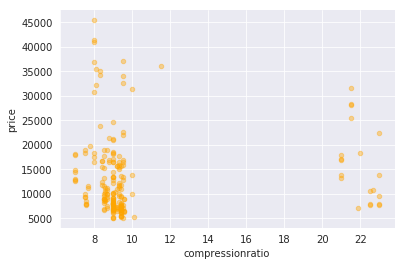

In [91]:
### Plot distribution for compressionratio vs price
plt.figure(figsize=(15,8))
df.plot.scatter(x="compressionratio", y= "price", alpha=0.4, color='orange')
sns.despine()

No significant realtion between compressionratio and price.

## **Horsepower vs Price**

<Figure size 576x432 with 0 Axes>

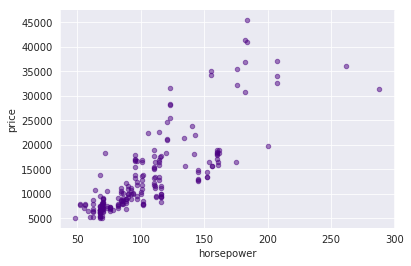

In [92]:
### Plot distribution for horsepower vs price
plt.figure(figsize=(8,6))
df.plot.scatter(x="horsepower", y= "price", alpha=0.5, color='indigo')
sns.despine()

Positive correlation between horsepower and price.

## **Company Name vs Price**

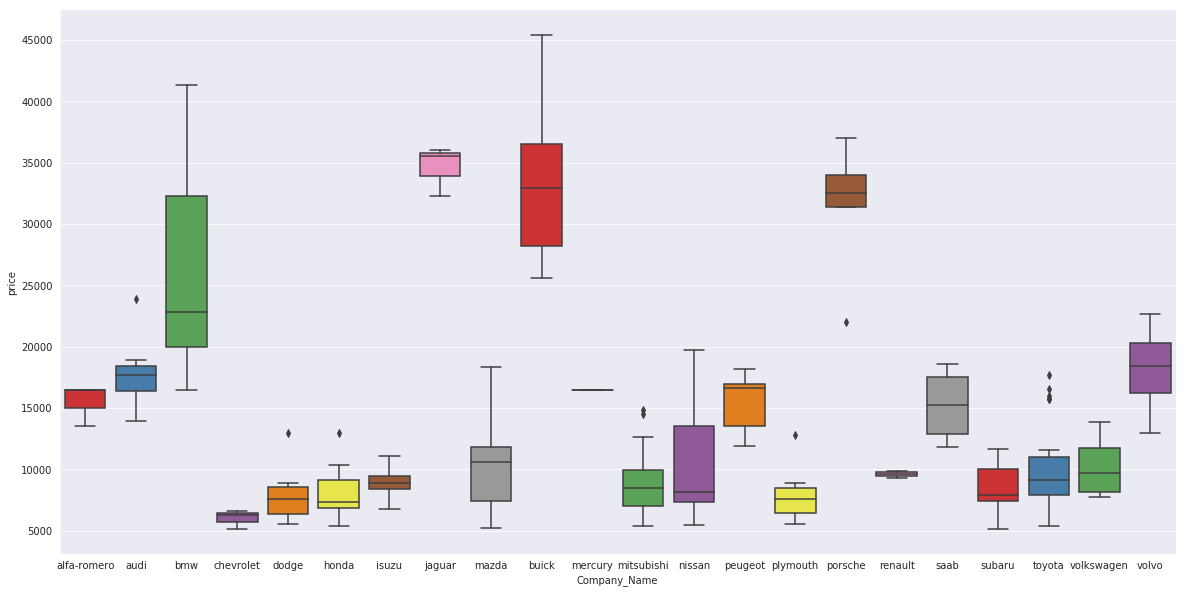

In [93]:
### Plot distribution to check how company name affect the prices of a car
plt.figure(figsize=(20,10))
sns.boxplot(x="Company_Name", y= "price", data=df, palette= "Set1")
sns.despine()



*   Prices of the car depeds upon the company name.

*   bmw and buick cars have very high prices.



# **Correlation between the Variables**

Let's see the correlation between the variables. How one variable

is correlated with the other.

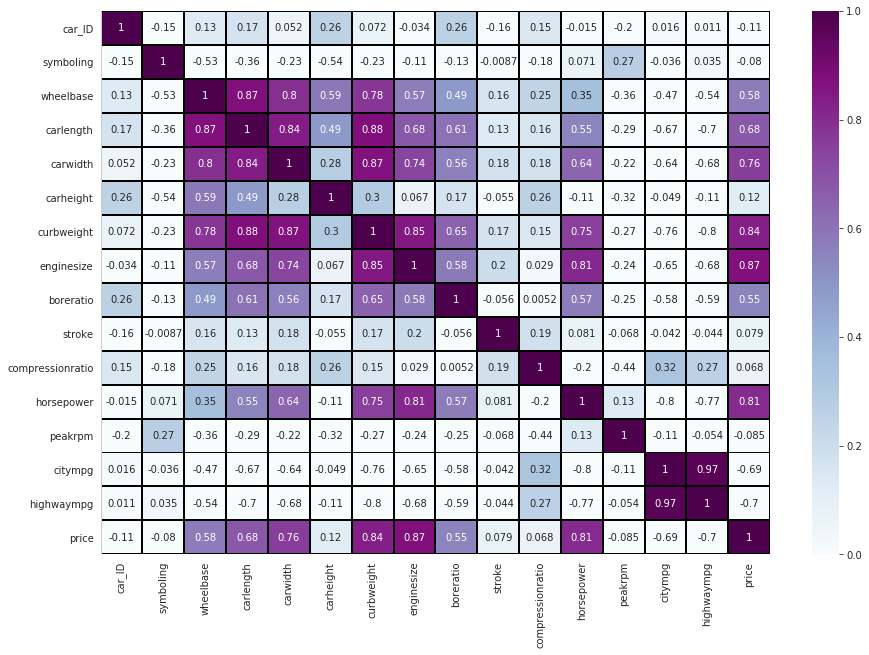

In [94]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), vmin=0, vmax=1,annot=True, cmap="BuPu", linewidth=1, linecolor ='black')
sns.despine()

We observe that:-

*  Carlength,  Carwidth, Curbweight, enginesize, horsepower share a very high correlation with price. 

*  Enginesize have a high correlation with horsepower.


In [0]:
### Taking the columns which affect the car prices the most

df1 = df[['fueltype', 'aspiration', 'carbody','wheelbase',
       'drivewheel', 'enginelocation', 'carlength', 'carwidth',
        'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio' ,'horsepower',
       'price', 'Company_Name']]

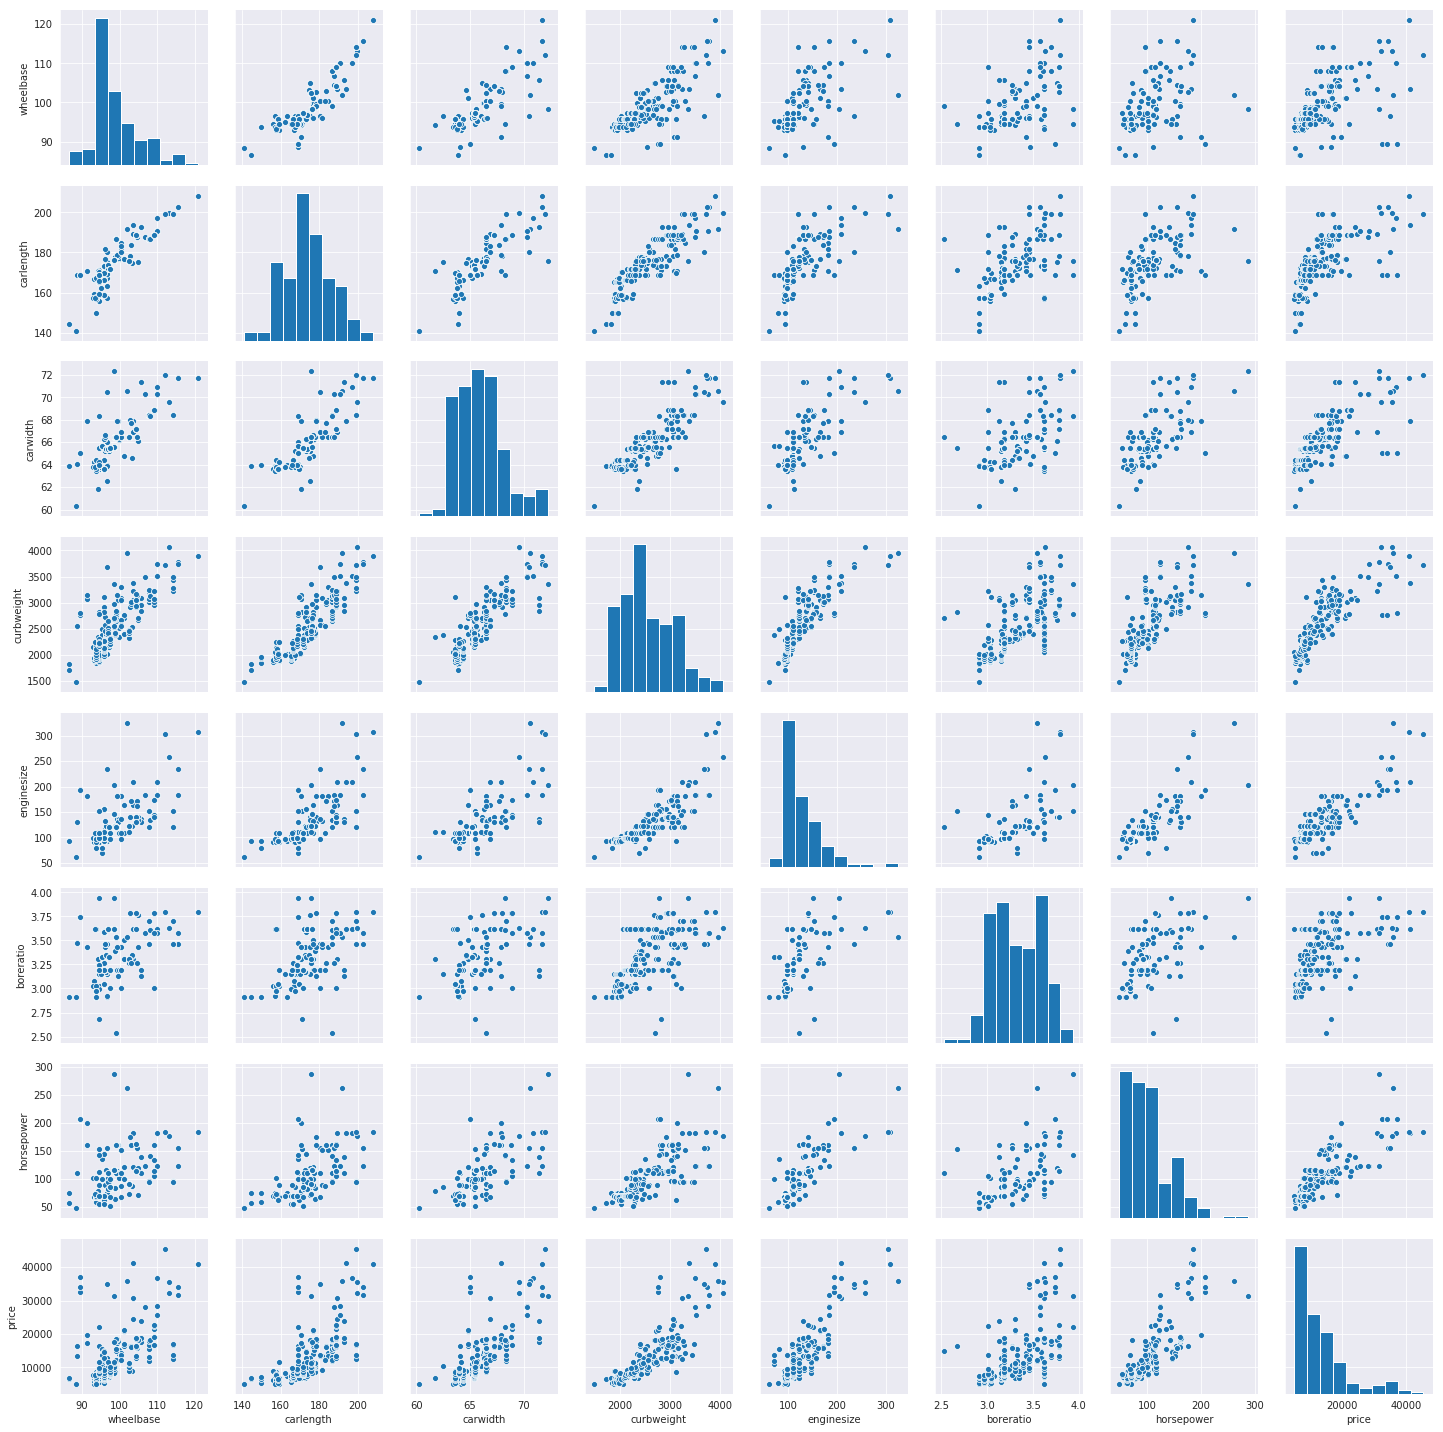

In [96]:
### Creating pairplots
sns.pairplot(df1)
plt.show()

# **Multivariate Analysis**

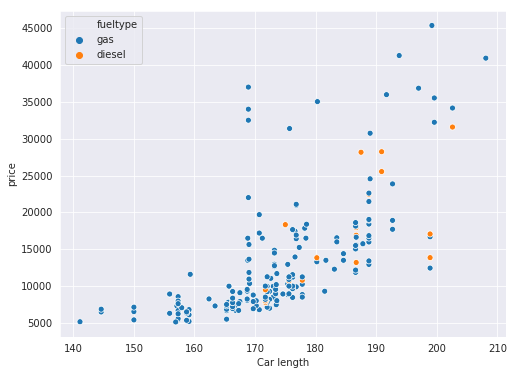

In [97]:
#scatter plot for multivariate analysis
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['carlength'],y=df['price'],hue=df['fueltype']);
plt.xlabel('Car length')
plt.ylabel('price')

plt.show()

We can observe that cars using diesel as fuel has less price when making a plot against the car length. 

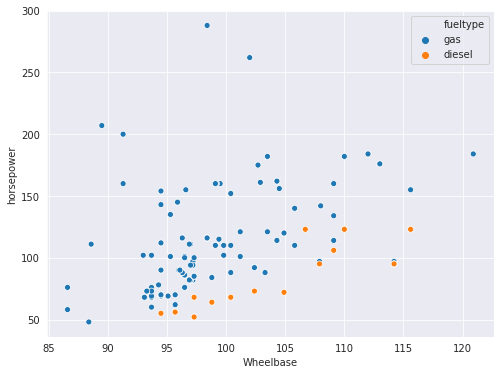

In [98]:
#scatter plot for multivariate analysis
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['wheelbase'],y=df['horsepower'],hue=df['fueltype'])

plt.xlabel('Wheelbase')
plt.ylabel('horsepower')

plt.show()

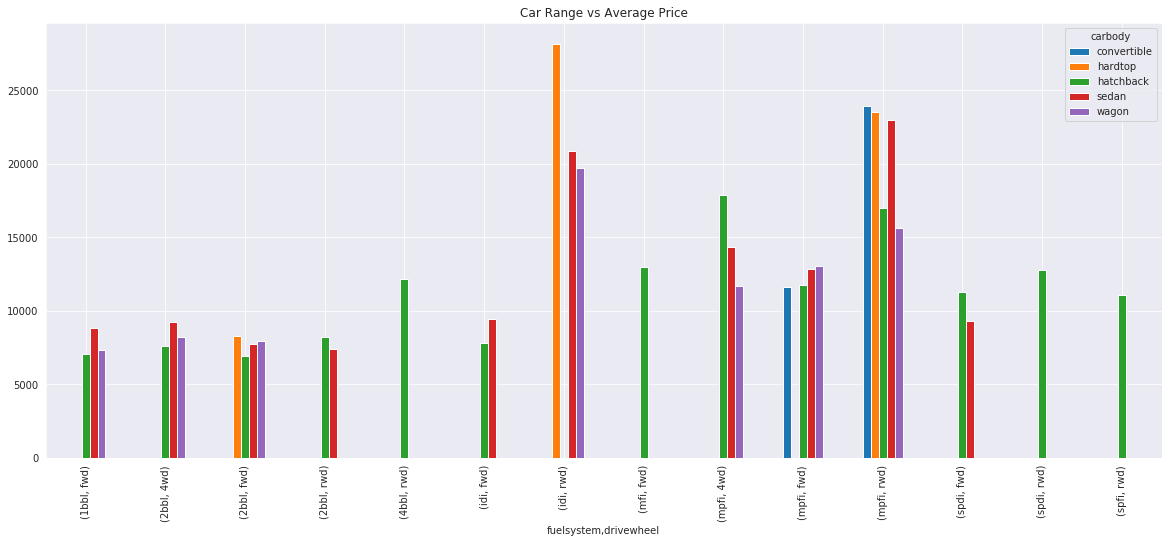

In [99]:
### Barplot for Car Range vs price
plt.rcParams['figure.figsize']=(20,8)
car = pd.DataFrame(df.groupby(['fuelsystem','drivewheel','carbody'])['price'].mean().unstack(fill_value=0))
car.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

We can observe that idi fuelsystem with rwd drive wheel and hardtop car body has the highest average price.

The combination of rwd and mpfi or rwd idi has medium to high price range for all type of carbody.

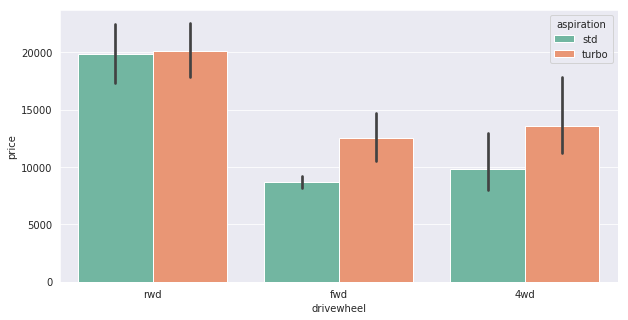

In [100]:
### plot distribution for drivewheel, price & Aspiration
plt.figure(figsize = (10,5))
sns.barplot(x='drivewheel', y='price',hue='aspiration', data=df,palette='Set2')

##  **CONCLUSION**

Our main aim was to find the the factors that effect the prices of the car in the US market the most. 

After performing the analysis we find the factors that effect the prices of car which includes:-



*   fueltype 

*   aspiration

*   carbody

*   drivewheel

*   wheelbase

*   enginelocation

*   carlength


*   carwidth


*   curbweight


*   enginetype



*  cylindernumber

*   enginesize

*   fuelsystem


*   boreratio



*   horsepower

*   Company_Name






